### Import Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [106]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
df = pd.read_csv('cali_housing.csv')
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### Data Dimension

In [108]:
df.shape

(20640, 9)

- Target Variable: `MedHouseVal` (Which is measured in 100 of thousands dollars)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


### Missing Data

In [110]:
#There are no missing values in the data.

df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Summary Statistics

In [111]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

### Datatypes

In [112]:
df.dtypes

MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [113]:
# All the variables are numeric.

### Distribution of the Variables

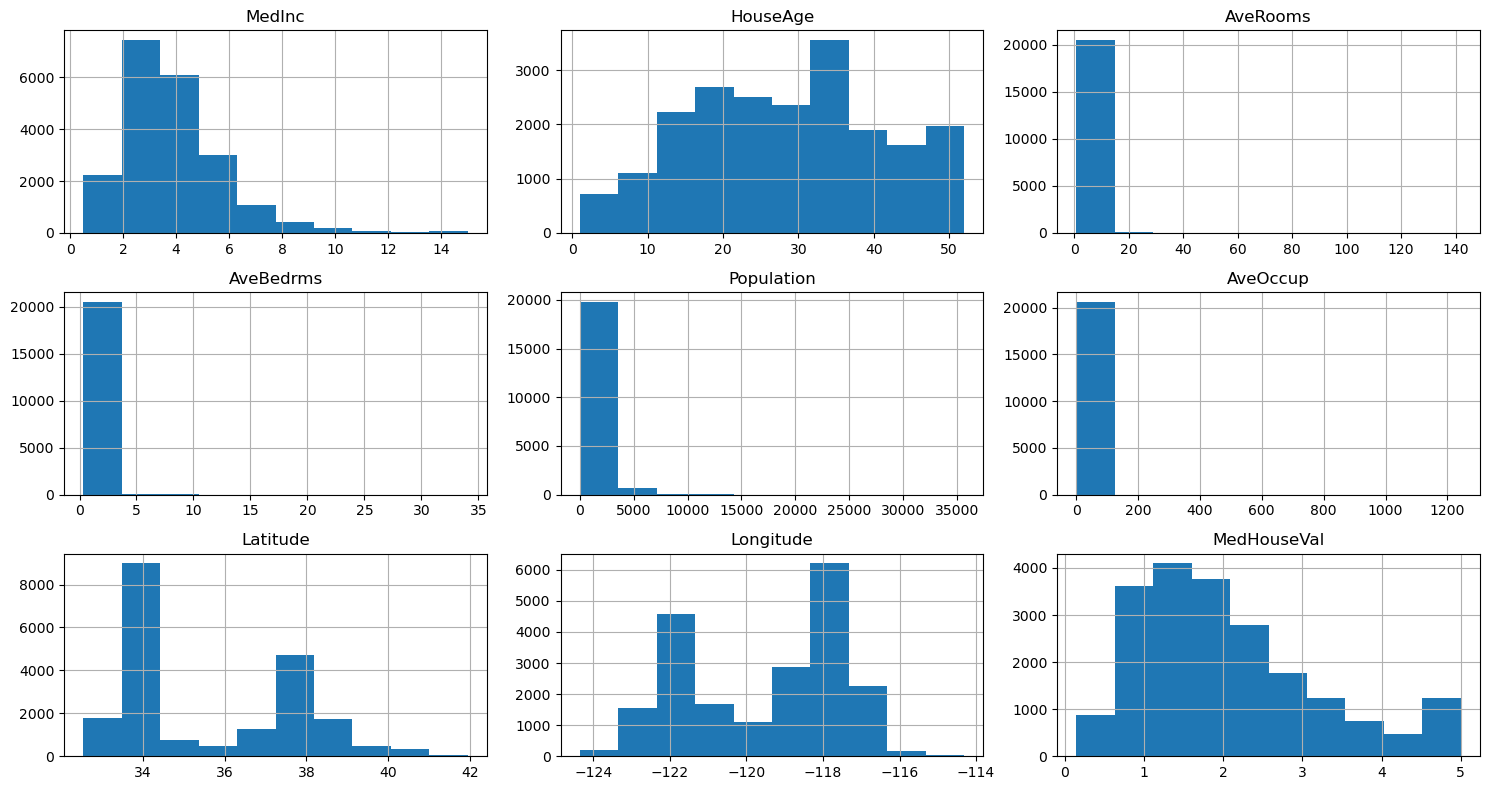

In [114]:
df.hist()
plt.tight_layout()

In [115]:
df.MedHouseVal.max()

5.00001

In [116]:
df[df.MedHouseVal>5]['MedHouseVal'].value_counts()

5.00001    965
Name: MedHouseVal, dtype: int64

- Here, We have a data discrepancy in the data. There are almost 965 values of 5.00001 which is unusual. By looking at the distribution plot of MedHouseVal, We found that there is large bar at the end ie at around value 5, so we checked the values which are greater than 5 and found only one value ie 5.00001 is repeating 965, it might be a data entry error/discrepancy. We can either choose to drop these values or distribute these values over the remaining values in the data. Lets check the distribution of these values first .

In [117]:
df[df.MedHouseVal>5]['MedHouseVal'].value_counts().values/df.shape[0]*100

array([4.6753876])

- Its only 4.68% values of the whole dataset which is less than 5%, dropping these values doesn't make much difference.

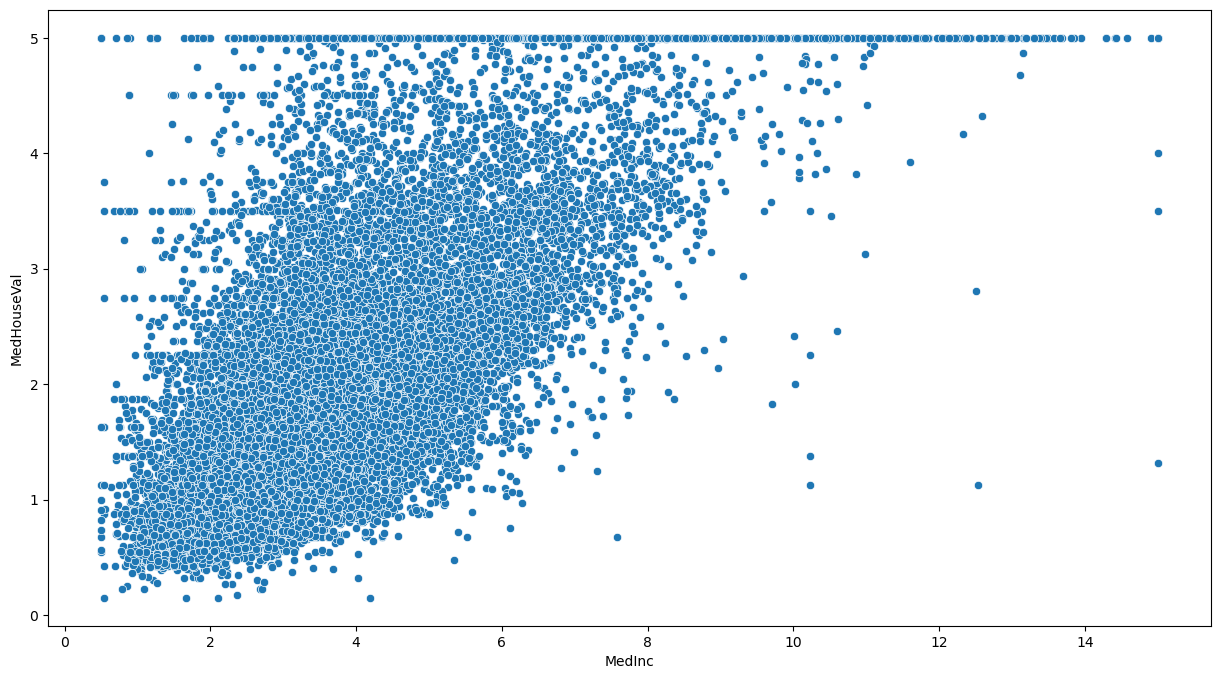

In [118]:
# A series of values can be seen at 5 in Y axis in the below scatterplot.

sns.scatterplot(data = df, x = 'MedInc', y = 'MedHouseVal');

In [119]:
df = (df[~(df.MedHouseVal==5.00001)]).reset_index(drop = True)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [120]:
df.shape

(19675, 9)

In [121]:
# Those values have been successfully removed.

In [122]:
df.skew()

MedInc          0.913123
HouseAge        0.069543
AveRooms       16.603950
AveBedrms      29.760761
Population      4.961349
AveOccup       95.475152
Latitude        0.456468
Longitude      -0.290800
MedHouseVal     0.809572
dtype: float64

In [123]:
# Most of the values are right skewed except the HouseAge. Its following a Normal Distribution.

### Duplicates

In [124]:
#No duplicate values

df[df.duplicated()]

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []

### Correlation

In [125]:
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.194784  0.325825  -0.065461    0.042360  0.026152   
HouseAge    -0.194784  1.000000 -0.180828  -0.084760   -0.295124  0.014867   
AveRooms     0.325825 -0.180828  1.000000   0.842363   -0.068897 -0.005230   
AveBedrms   -0.065461 -0.084760  0.842363   1.000000   -0.069270 -0.006594   
Population   0.042360 -0.295124 -0.068897  -0.069270    1.000000  0.070123   
AveOccup     0.026152  0.014867 -0.005230  -0.006594    0.070123  1.000000   
Latitude    -0.078026  0.006633  0.120960   0.073338   -0.113378  0.001915   
Longitude   -0.009067 -0.102504 -0.029353   0.013129    0.101061  0.002373   
MedHouseVal  0.642611  0.067948  0.109673  -0.061079    0.011964 -0.021465   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.078026  -0.009067     0.642611  
HouseAge     0.006633  -0.102504     0.067948  
AveRooms     0.120960  -0.029353     0.109673  
AveBedrms    0.073338   0.013129    -0.061079  
Population  -0.113378   0.101061     0.011964  
AveOccup     0.001915   0.002373    -0.021465  
Latitude     1.000000  -0.924139    -0.148289  
Longitude   -0.924139   1.000000    -0.046658  
MedHouseVal -0.148289  -0.046658     1.000000

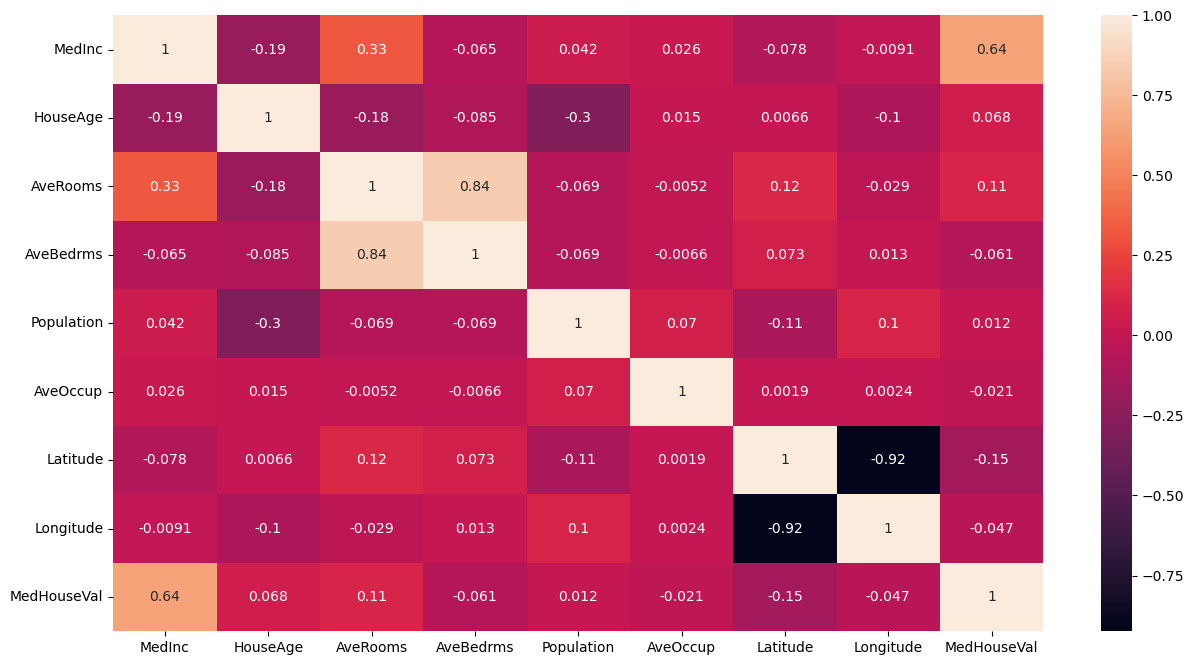

In [126]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [127]:
# We have only one variable which is showing a correlation with the target variable. (MedInc)
# There is a little bit of Multicollinearity in the data.
# AveBedrooms is correlated with AveRooms.

### Pairplot

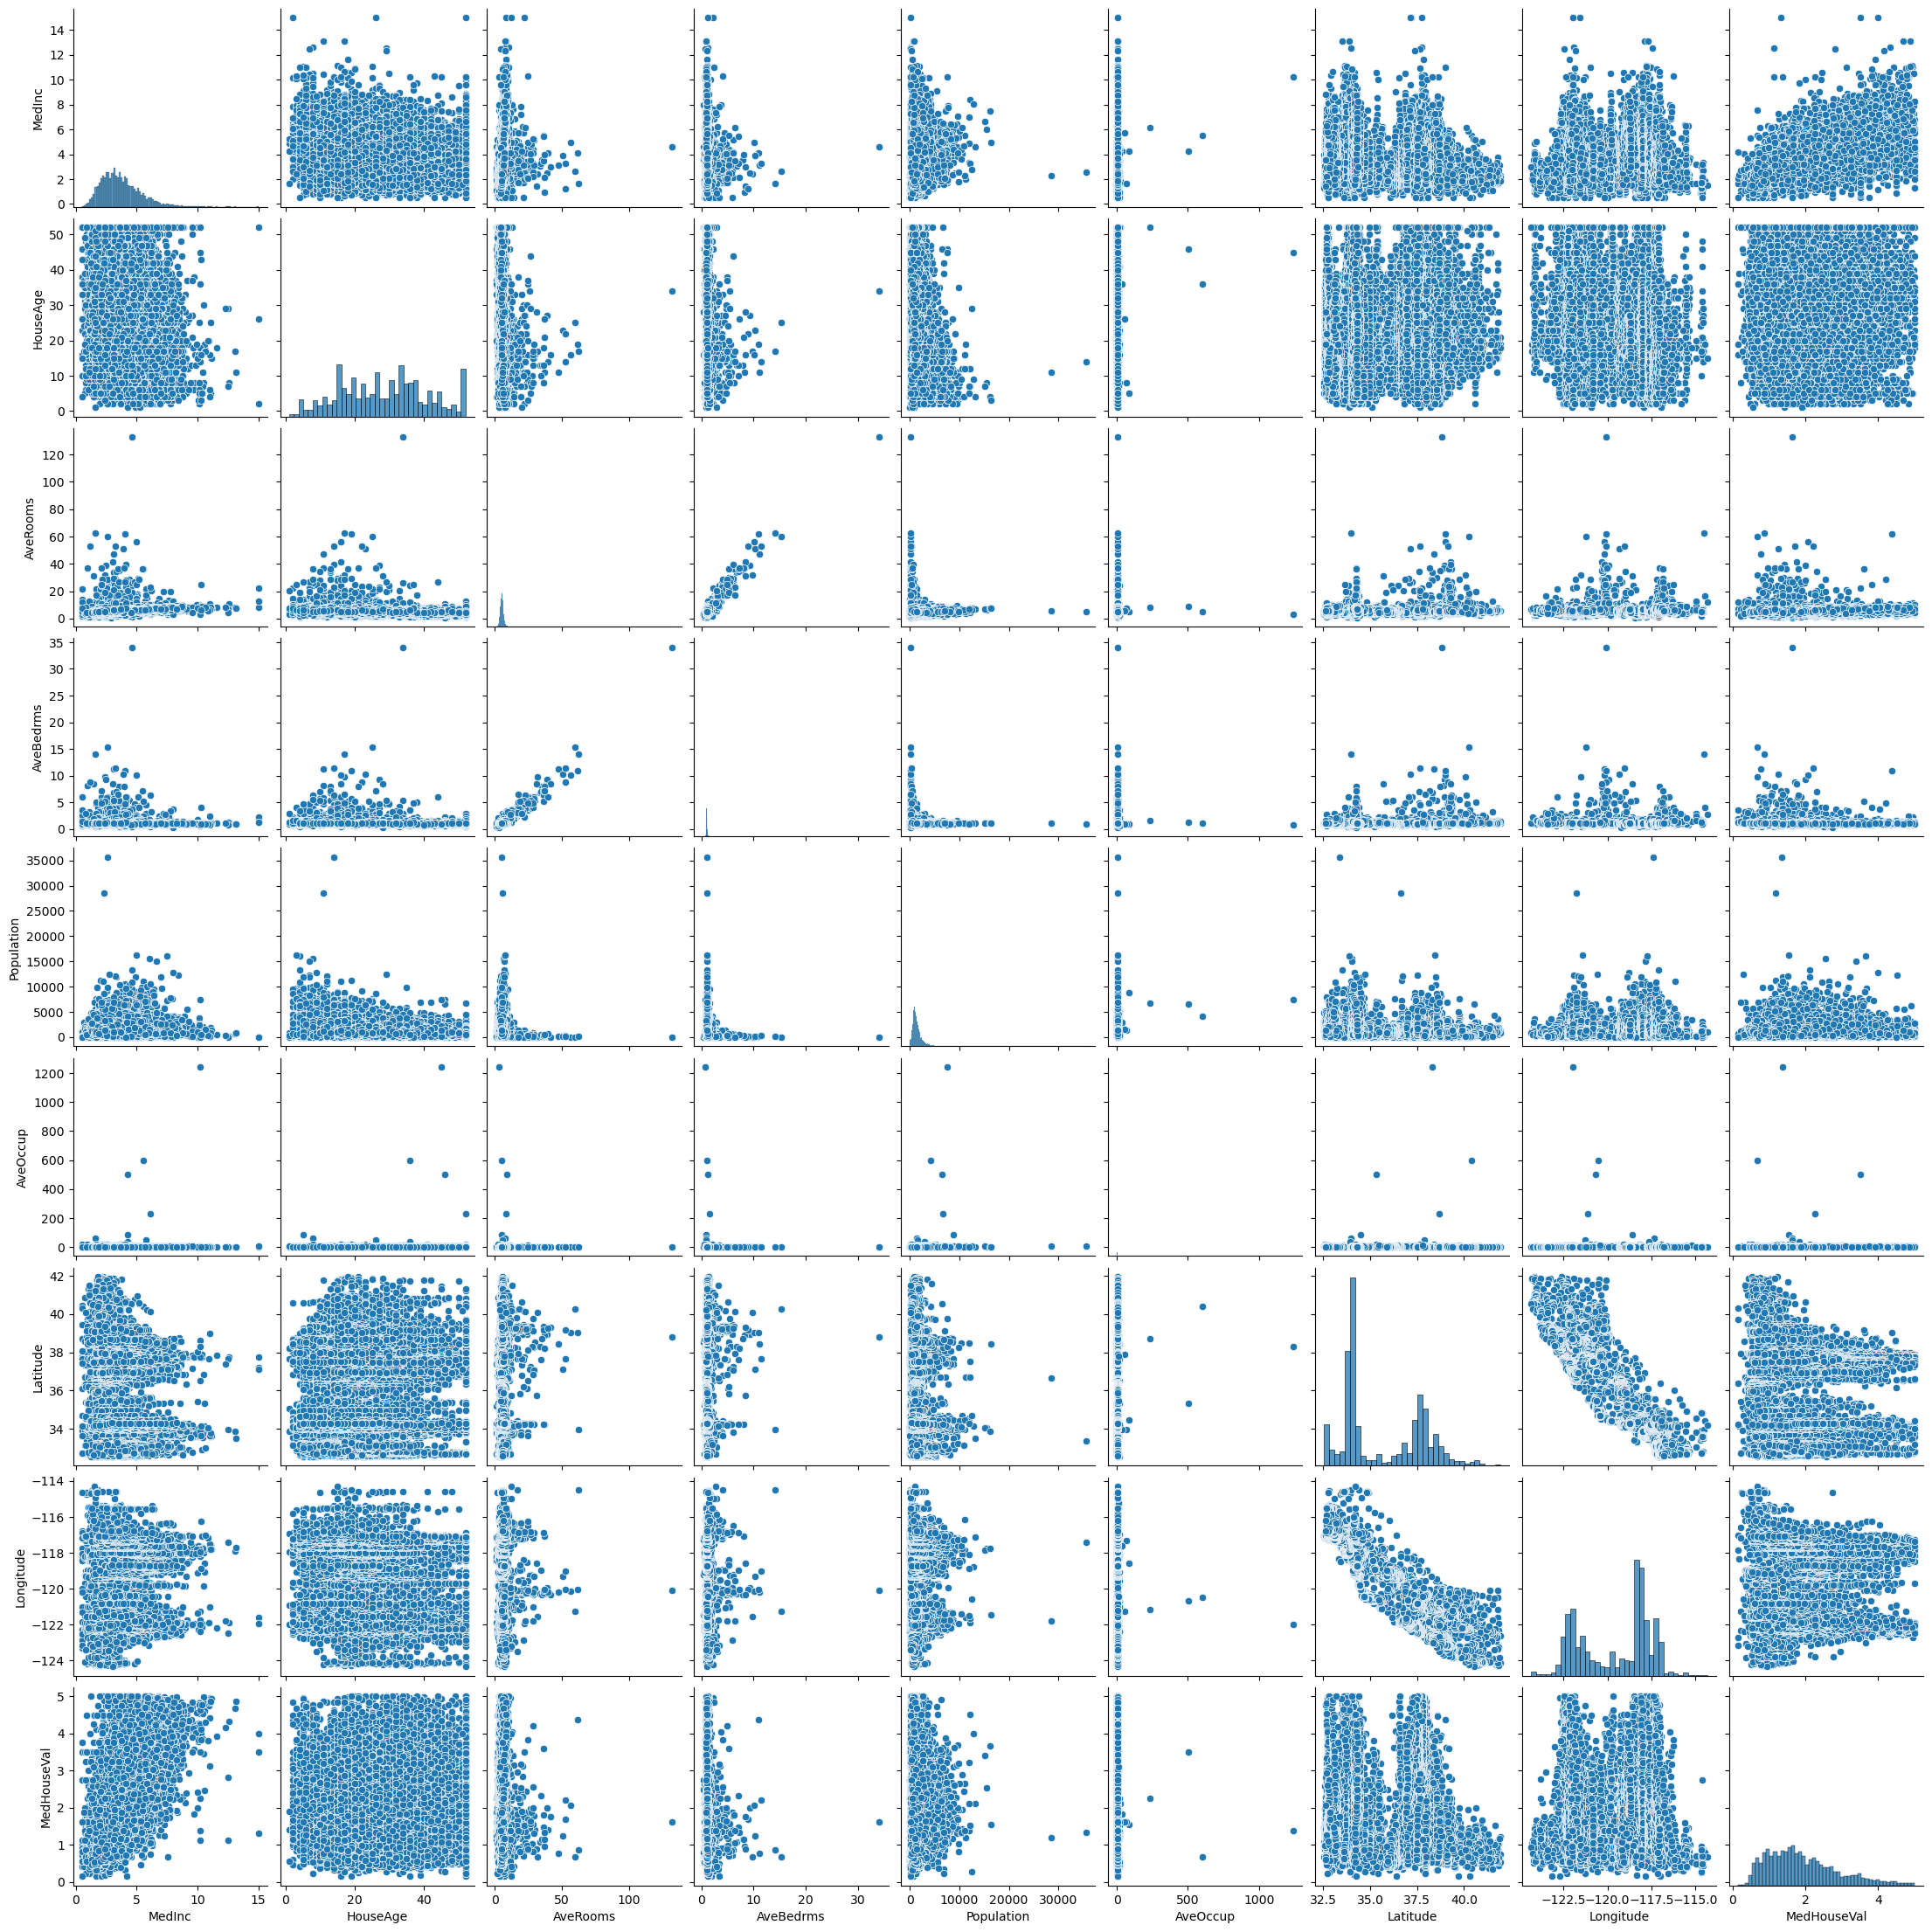

In [128]:
sns.pairplot(df)
plt.show()

In [129]:
# There is hardly any correlation between the independent variables.

### Outliers

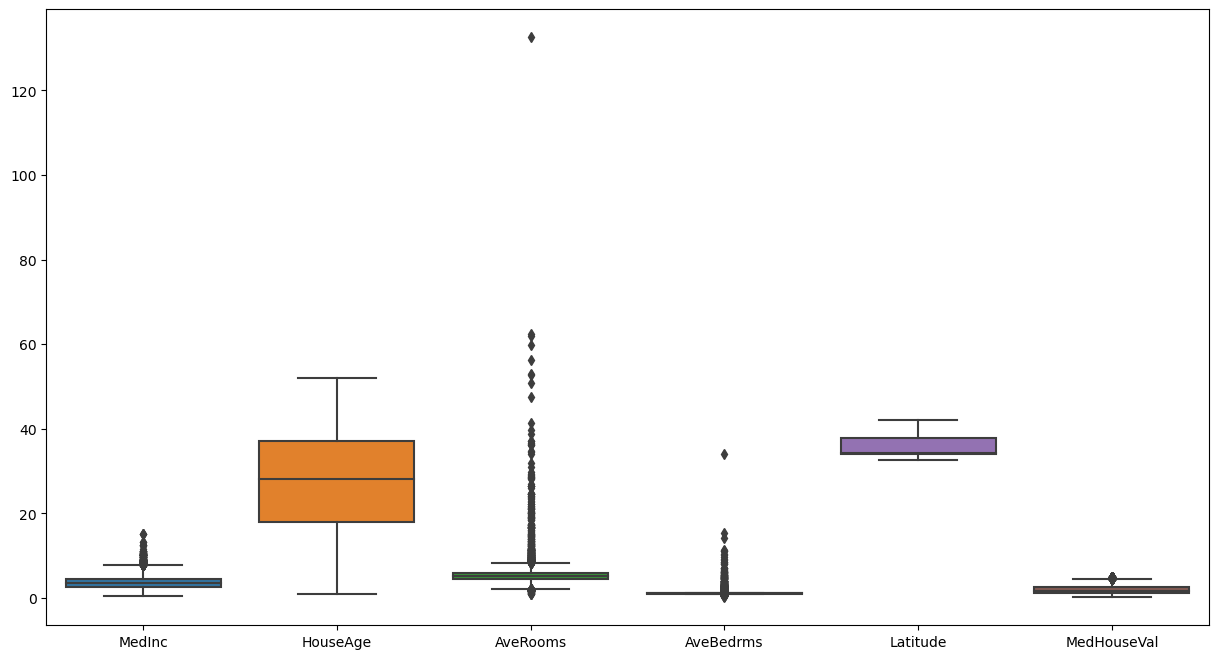

In [130]:
sns.boxplot(df.drop(['Population','AveOccup', 'Longitude'], axis = 1))
plt.show()

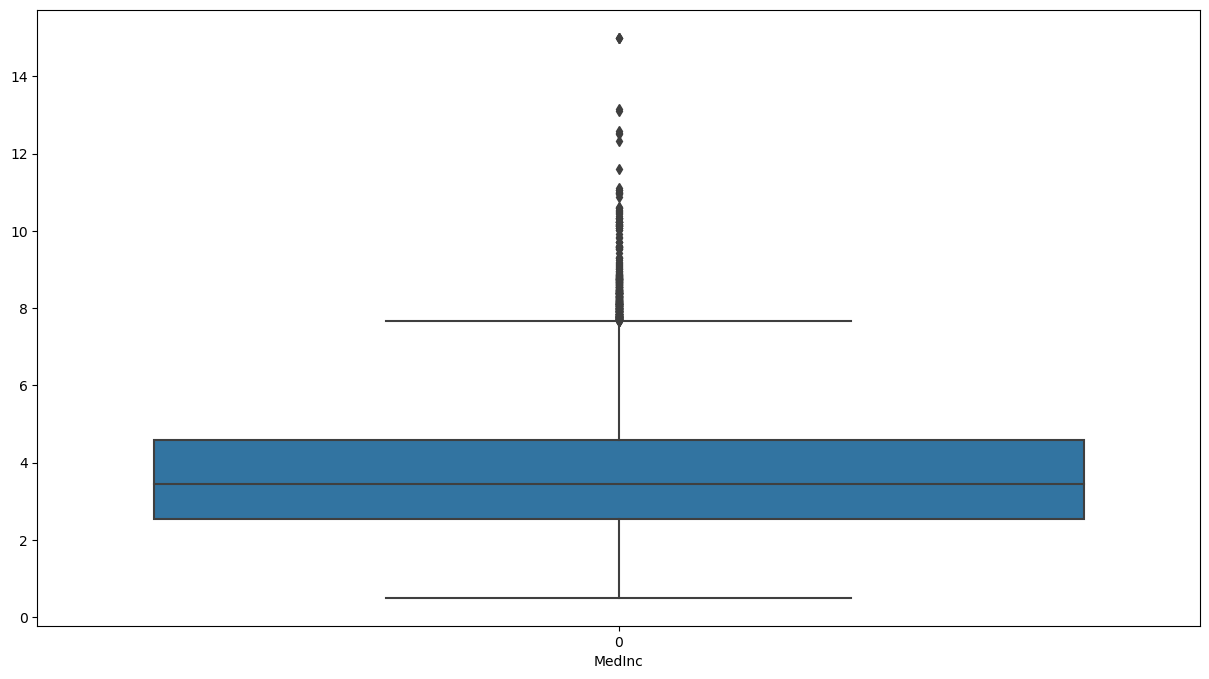

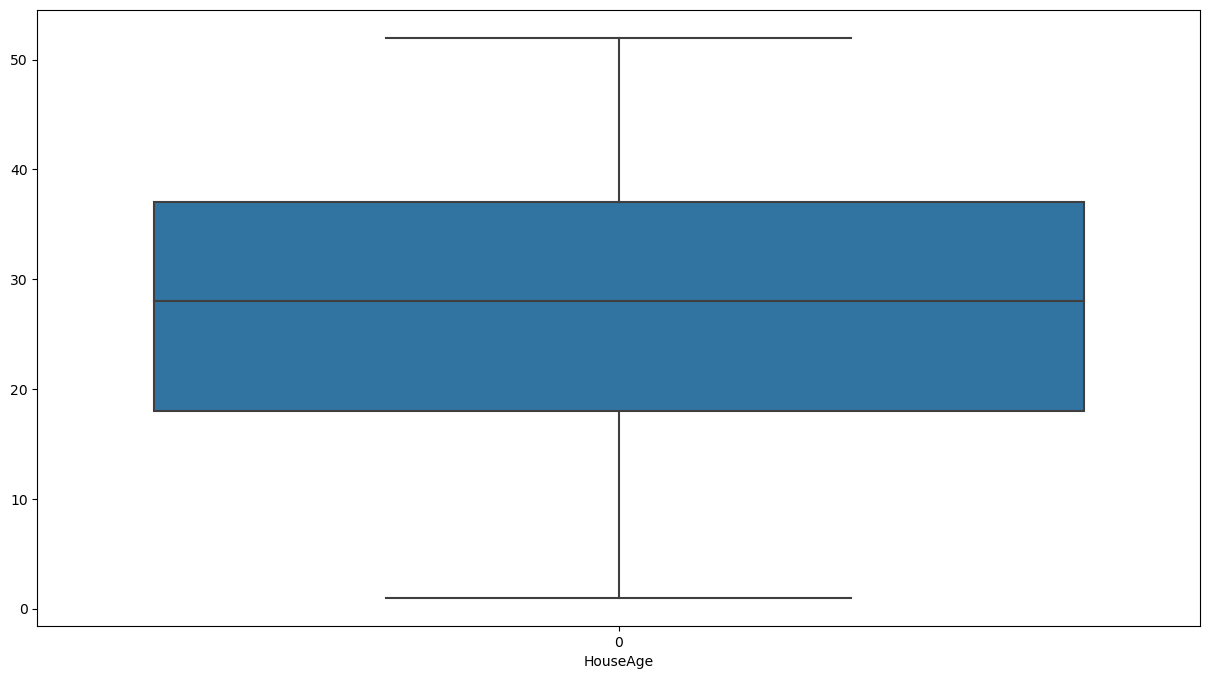

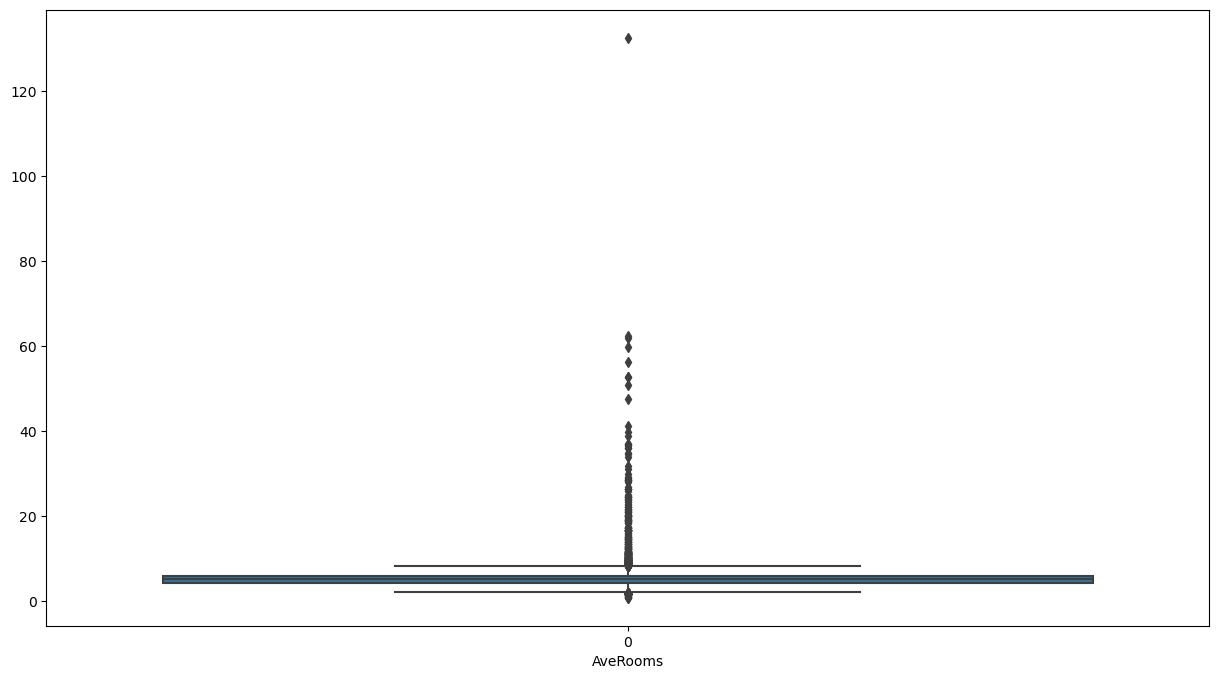

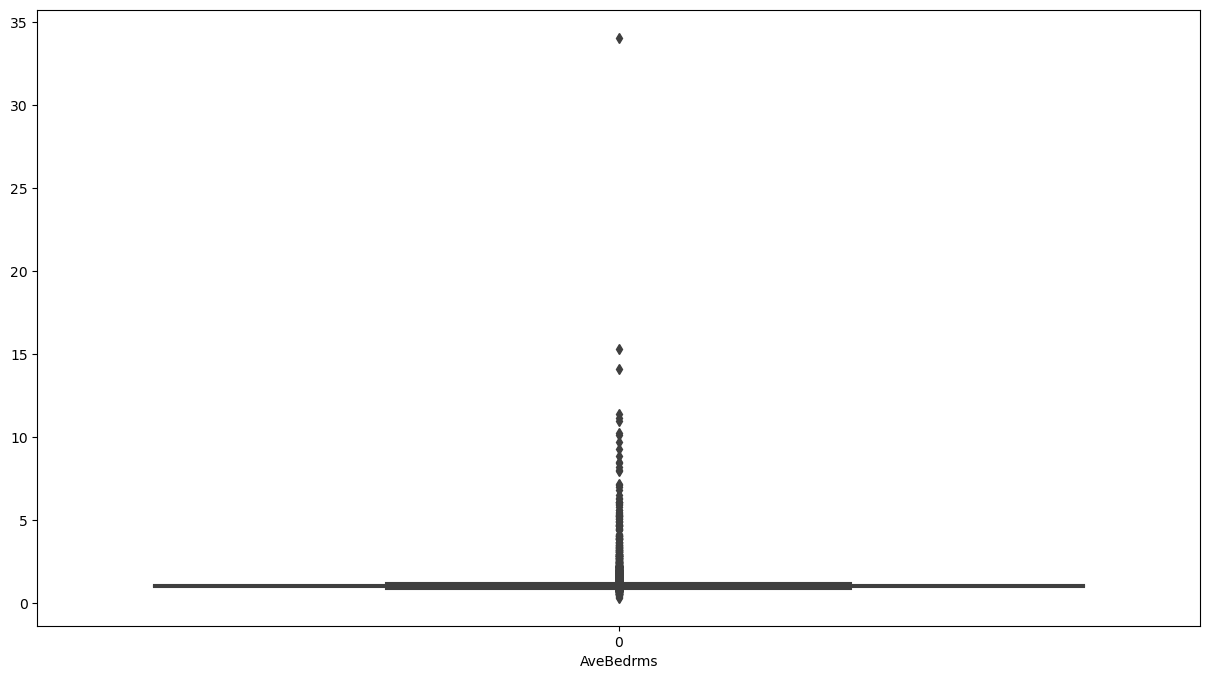

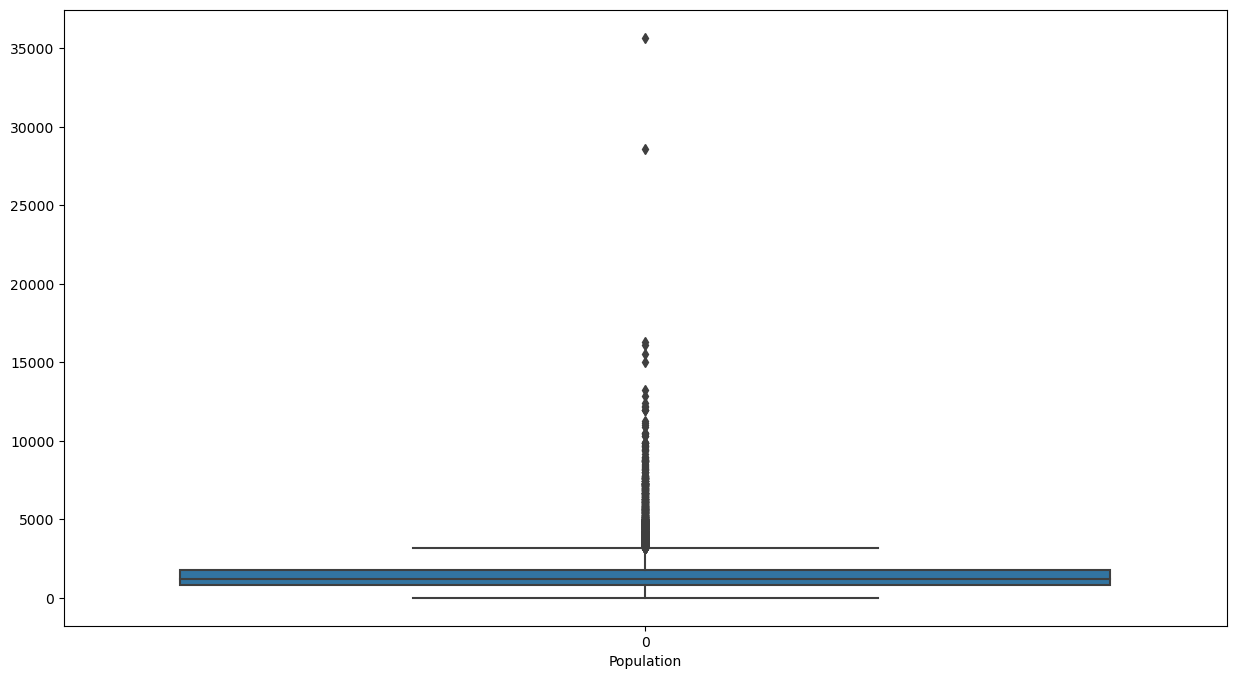

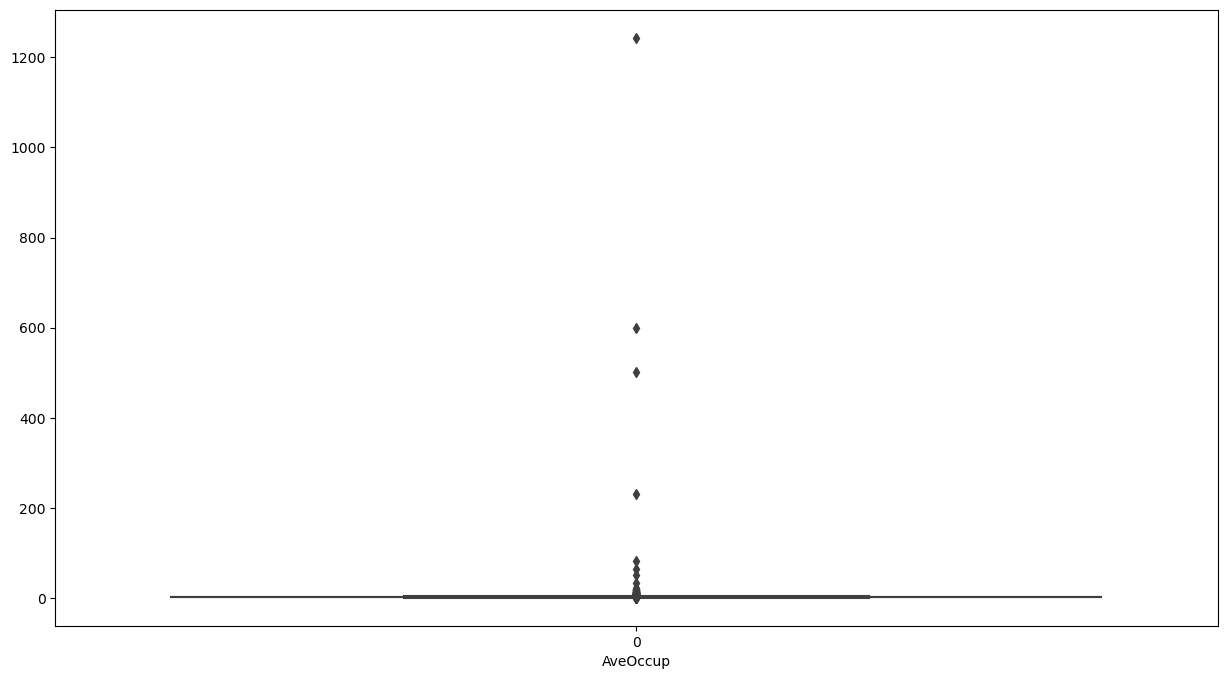

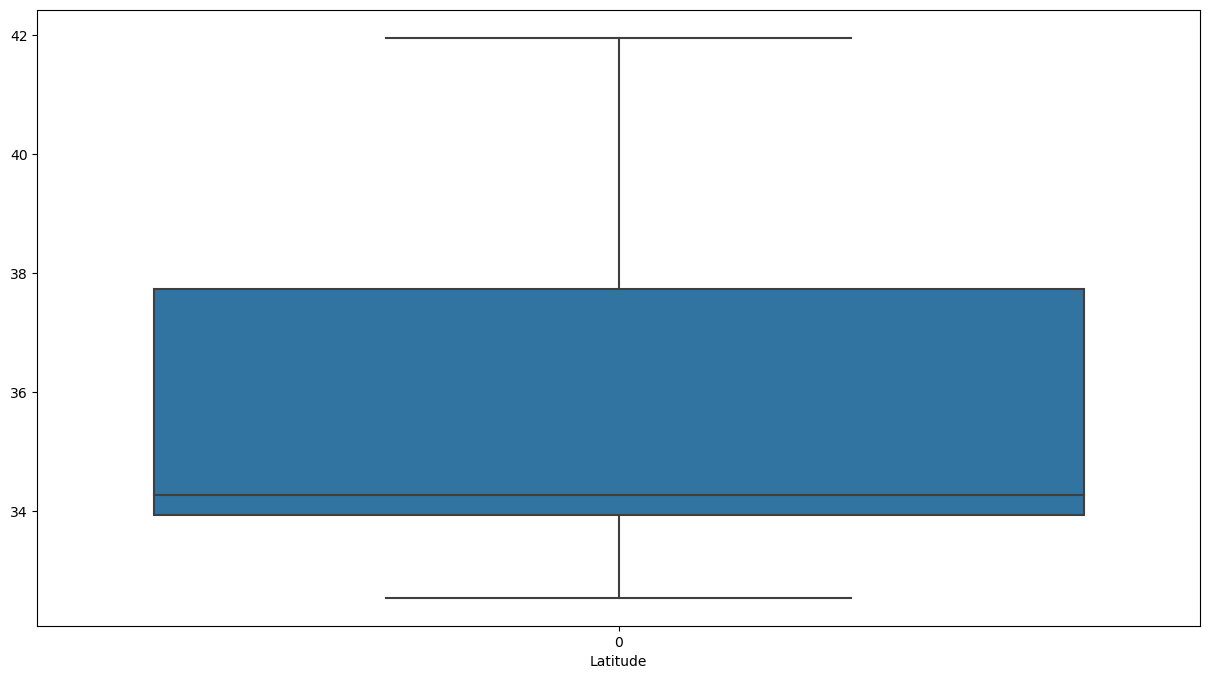

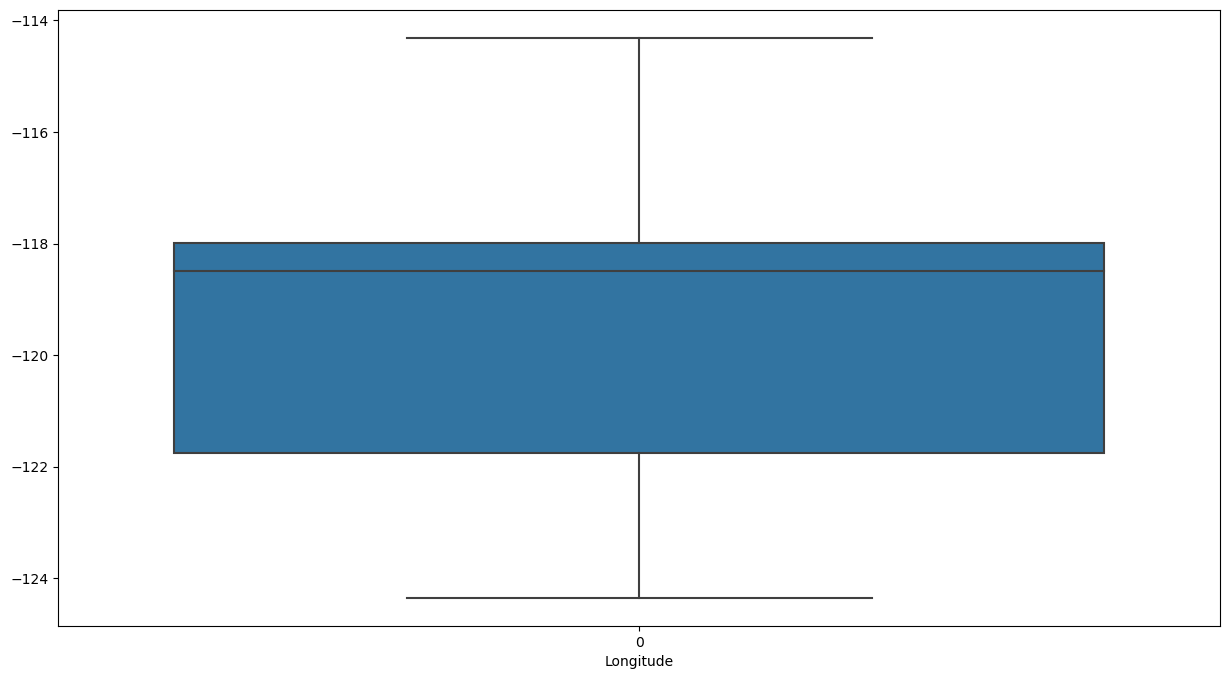

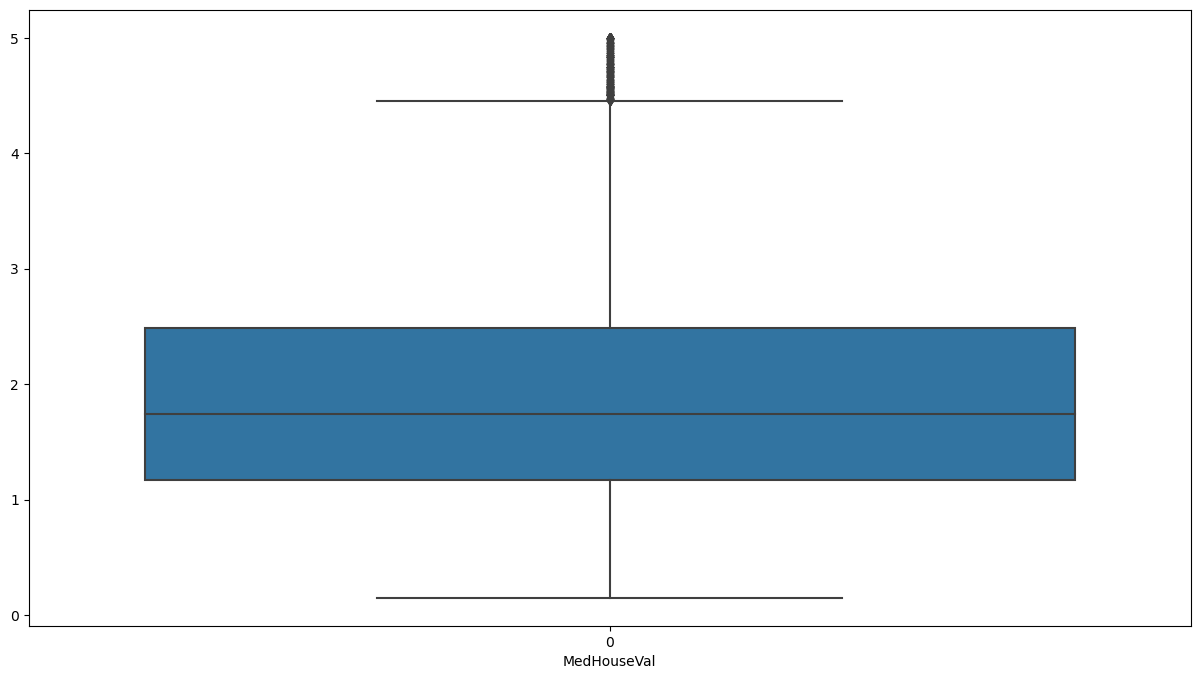

In [131]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

- There are outliers in the data. But we prefer not to drop them. Lets build the model on the whole dataset and then select the import variables using the important features hyperparameter provided by the Decision Tree.

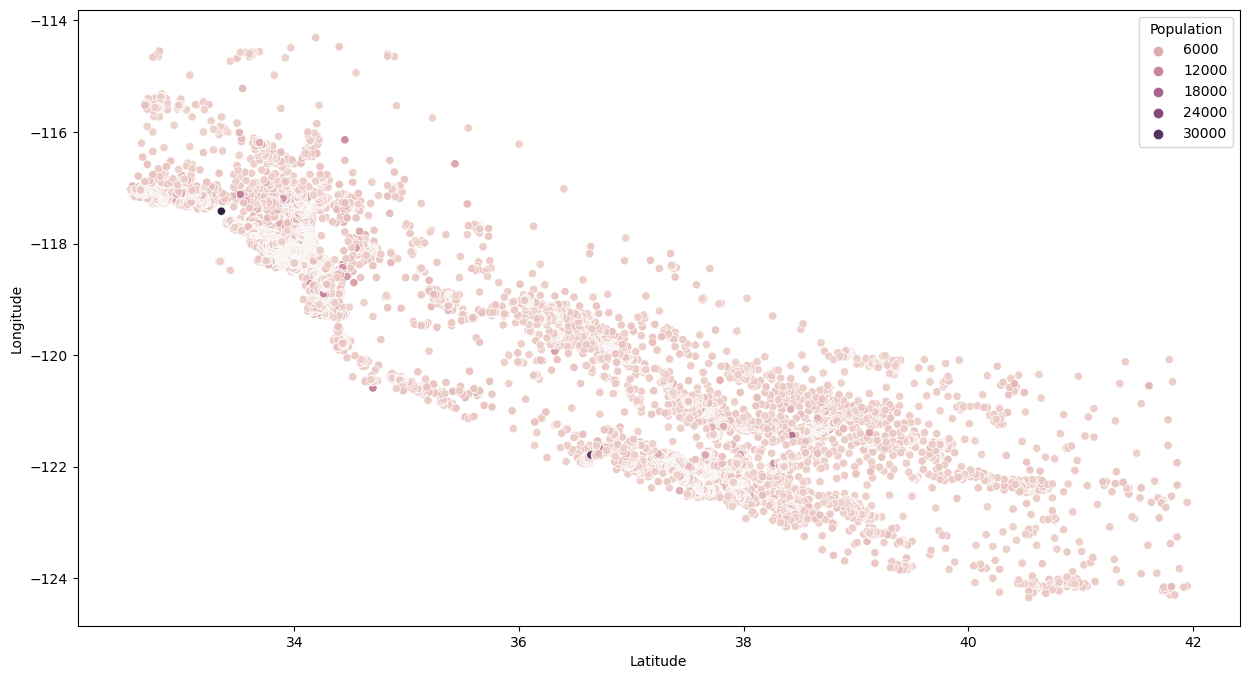

In [132]:
sns.scatterplot(data = df, x = 'Latitude', y = 'Longitude', hue = 'Population')
plt.show()

In [133]:
# We can see there are more number of 6000, 120000 values in the latitude and longitude region.

### Model Building

In [134]:
# First lets use two variables: MedInc and the target variable: MedHouseVal

In [135]:
df.head(2)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127    1.02381         322  2.555556     37.88   
1  8.3014        21  6.238137    0.97188        2401  2.109842     37.86   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585

In [136]:
X = df[['MedInc']]
y = df['MedHouseVal']

In [137]:
df_test = df[['MedInc', 'MedHouseVal']]
df_test.head(2)

MedInc  MedHouseVal
0  8.3252        4.526
1  8.3014        3.585

In [138]:
# Lets run a basic DecisionTreeRegressor model on the test data that we took for two variables.

In [139]:
Dec_reg = tree.DecisionTreeRegressor()
Dec_reg.fit(X, y)

DecisionTreeRegressor()

In [140]:
Dec_reg.predict([[8.3252]])

array([4.526])

In [141]:
df_test['Pred_Value'] = Dec_reg.predict(X)
df_test.Pred_Value = np.round(df_test.Pred_Value, 3)
df_test.head(10)

MedInc  MedHouseVal  Pred_Value
0  8.3252        4.526       4.526
1  8.3014        3.585       3.585
2  7.2574        3.521       3.521
3  5.6431        3.413       3.413
4  3.8462        3.422       2.868
5  4.0368        2.697       1.973
6  3.6591        2.992       1.960
7  3.1200        2.414       1.969
8  2.0804        2.267       1.557
9  3.6912        2.611       2.611

In [142]:
# Most of the values are predictly correctly, but there are also a few misclassifications.

In [143]:
#MSE Value

print('MSE_Value:',metrics.mean_squared_error(y, Dec_reg.predict(X)))

MSE_Value: 0.20654159583289455


In [144]:
#RMSE Value

print('RMSE_Value:',np.sqrt(metrics.mean_squared_error(y, Dec_reg.predict(X))))

RMSE_Value: 0.4544684761706741


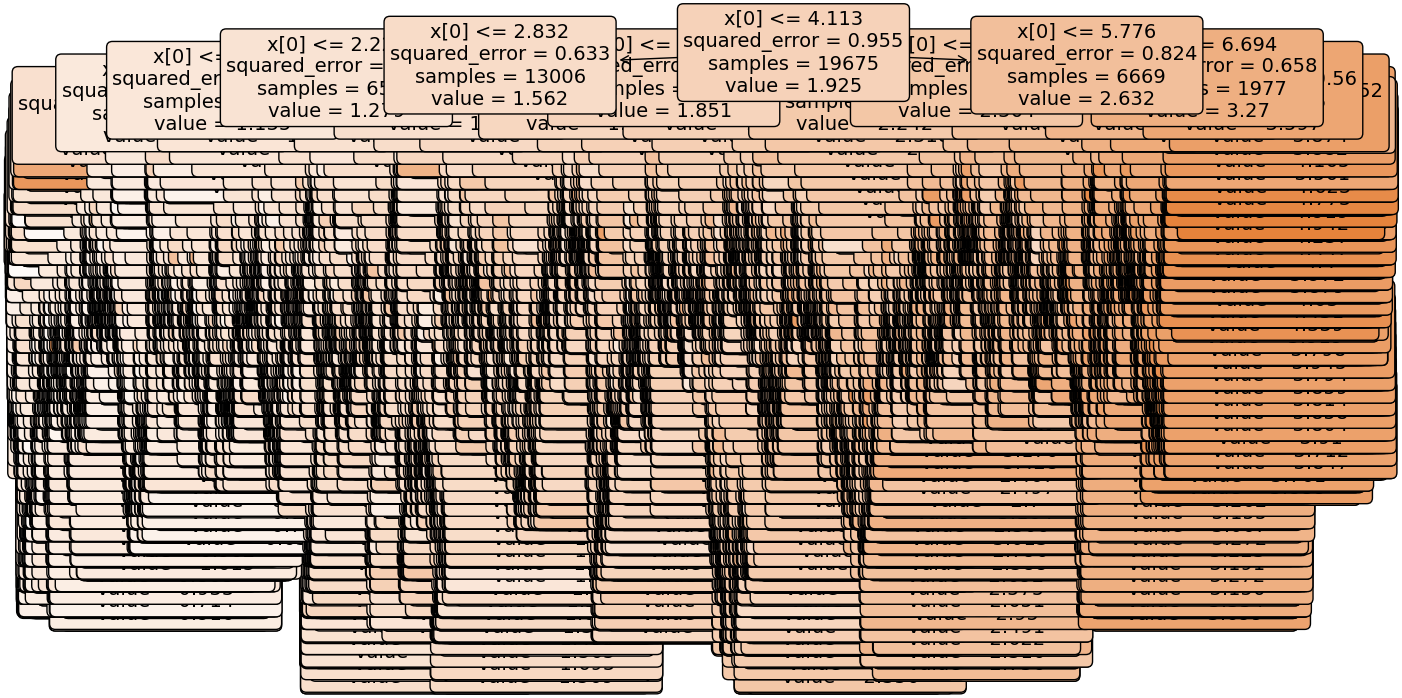

In [145]:
tree.plot_tree(Dec_reg,
               filled=True, 
               rounded=True,
               fontsize=14);

In [146]:
# This tree looks really clumpsy, lets use the hyperparameter min_samples_split to cut down the lenbth of the tree.

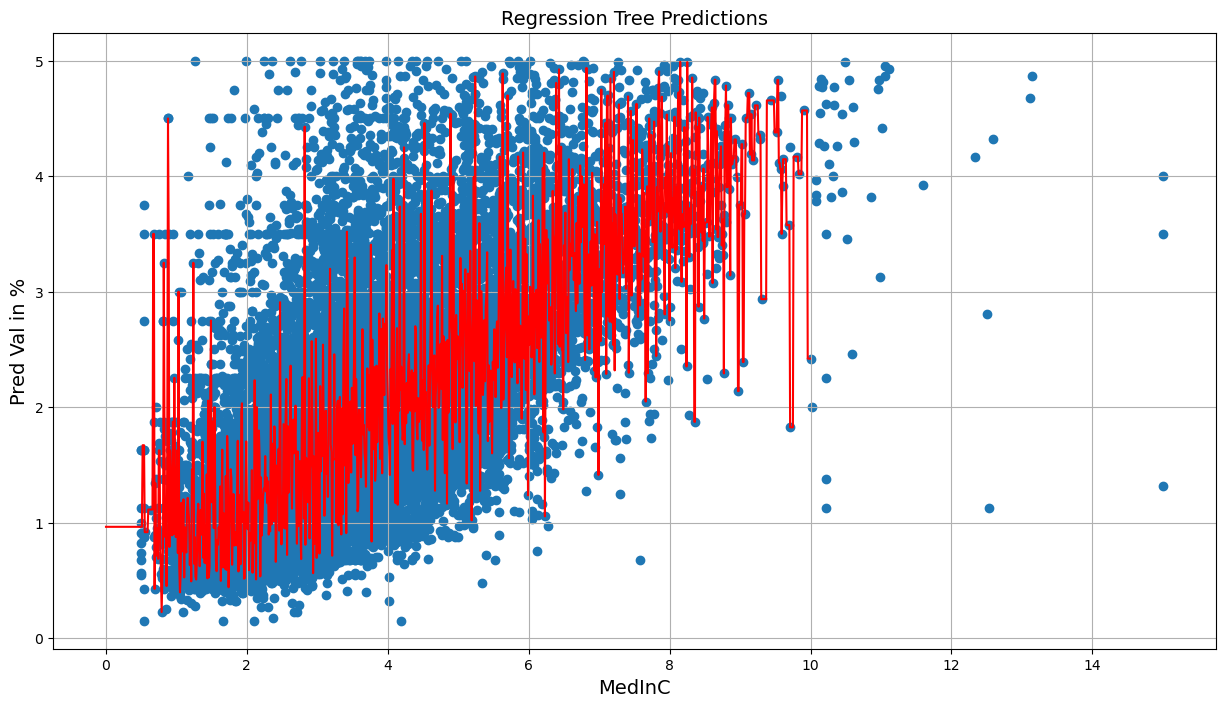

In [147]:
plt.scatter(X, y)

domain = np.arange(0, 10, 0.01)
domain = domain.reshape((len(domain)),1)
plt.plot(domain, Dec_reg.predict(domain), color = 'red')

plt.xlabel('MedInC', fontsize=14)
plt.ylabel('Pred Val in %', fontsize=14);
plt.title('Regression Tree Predictions', fontsize=14)
plt.grid();

In [148]:
Dec_reg_prune = tree.DecisionTreeRegressor(max_depth=5)
Dec_reg_prune.fit(X, y)

DecisionTreeRegressor(max_depth=5)

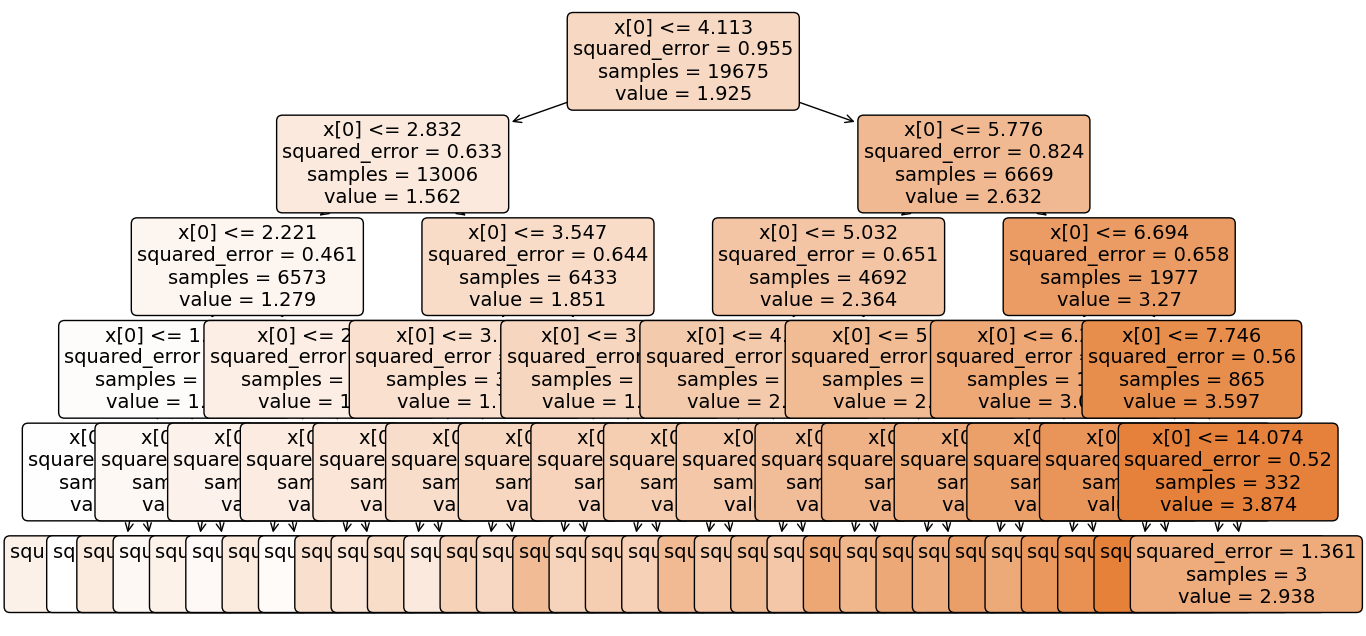

In [149]:
tree.plot_tree(Dec_reg_prune,
               filled=True, 
               rounded=True,
               fontsize=14);

In [150]:
#MSE Value

print('MSE_Value:',metrics.mean_squared_error(y, Dec_reg_prune.predict(X)))

MSE_Value: 0.5482013058546586


In [151]:
#RMSE Value

print('RMSE_Value:',np.sqrt(metrics.mean_squared_error(y, Dec_reg_prune.predict(X))))

RMSE_Value: 0.7404061762672288


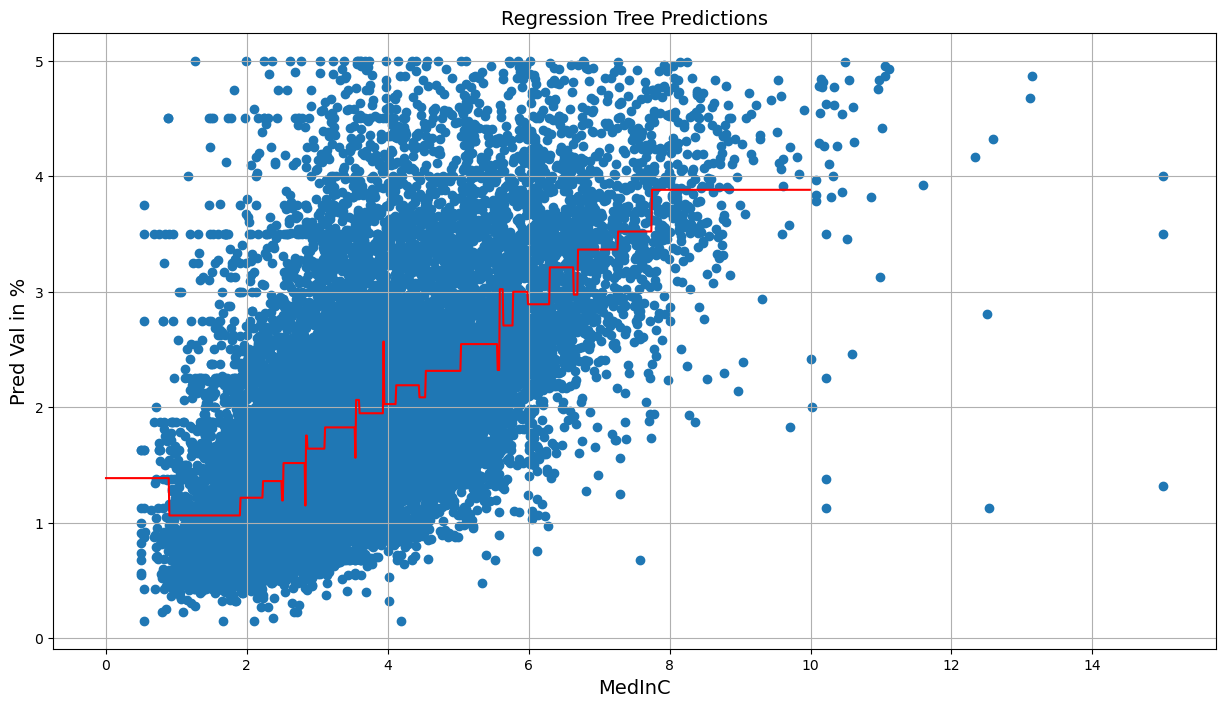

In [152]:
plt.scatter(X, y)

domain = np.arange(0, 10, 0.01)
domain = domain.reshape((len(domain)),1)
plt.plot(domain, Dec_reg_prune.predict(domain), color = 'red')

plt.xlabel('MedInC', fontsize=14)
plt.ylabel('Pred Val in %', fontsize=14);
plt.title('Regression Tree Predictions', fontsize=14)
plt.grid();

In [153]:
Dec_reg_prune.get_n_leaves()

32

### Model Building on the Original dataset

In [154]:
X = df.drop('MedHouseVal', axis = 1)
y = df[['MedHouseVal']]

In [155]:
X.head(2)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127    1.02381         322  2.555556     37.88   
1  8.3014        21  6.238137    0.97188        2401  2.109842     37.86   

   Longitude  
0    -122.23  
1    -122.22

In [156]:
y[:2]

MedHouseVal
0        4.526
1        3.585

In [157]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [158]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (15740, 8)
X_test: (3935, 8)
y_train: (15740, 1)
y_test: (3935, 1)


In [159]:
Decision_tree = tree.DecisionTreeRegressor()
Decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [160]:
# Score on train data

Decision_tree.score(X_train, y_train)

1.0

In [161]:
# Score on test data

Decision_tree.score(X_test, y_test)

0.5515461555390375

1. We can see that there is a huge overfitting in the data. 
2. Either we can prune the tree or use GridSearchCV.

In [162]:
#tree.plot_tree(Decision_tree, filled = True);

In [163]:
#MSE Value

print('MSE_Value:',metrics.mean_squared_error(y_test, Decision_tree.predict(X_test)))

MSE_Value: 0.44715269219832277


In [164]:
#RMSE Value

print('RMSE_Value:',np.sqrt(metrics.mean_squared_error(y_test, Decision_tree.predict(X_test))))

RMSE_Value: 0.6686947675870679


In [165]:
# RMSE value is also high reaching almost to the 0.669, We can select few hyperparameters and check the error.

### Decision Tree on testing some random hyperparameters

In [166]:
dec_tree = tree.DecisionTreeRegressor( max_depth=10,
                                      min_samples_split=10, min_samples_leaf=5)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [167]:
dec_tree.score(X_train, y_train)

0.8046701640689807

In [168]:
dec_tree.score(X_test, y_test)

0.6674652797367036

In [169]:
# A good score on training data but a little score on the testing data. Overfitting is observed.

In [170]:
#tree.plot_tree(dec_tree, filled = True);

In [171]:
#MSE Value

print('MSE_Value:',metrics.mean_squared_error(y_test, dec_tree.predict(X_test)))

MSE_Value: 0.3315698978874354


In [172]:
#RMSE Value

print('RMSE_Value:',np.sqrt(metrics.mean_squared_error(y_test, dec_tree.predict(X_test))))

RMSE_Value: 0.5758210641227319


In [173]:
#MAE Value

print('MAE_Value:',metrics.mean_absolute_error(y_test, dec_tree.predict(X_test)))

MAE_Value: 0.38984059004064325


In [174]:
# RMSE value has been reduced little bit.

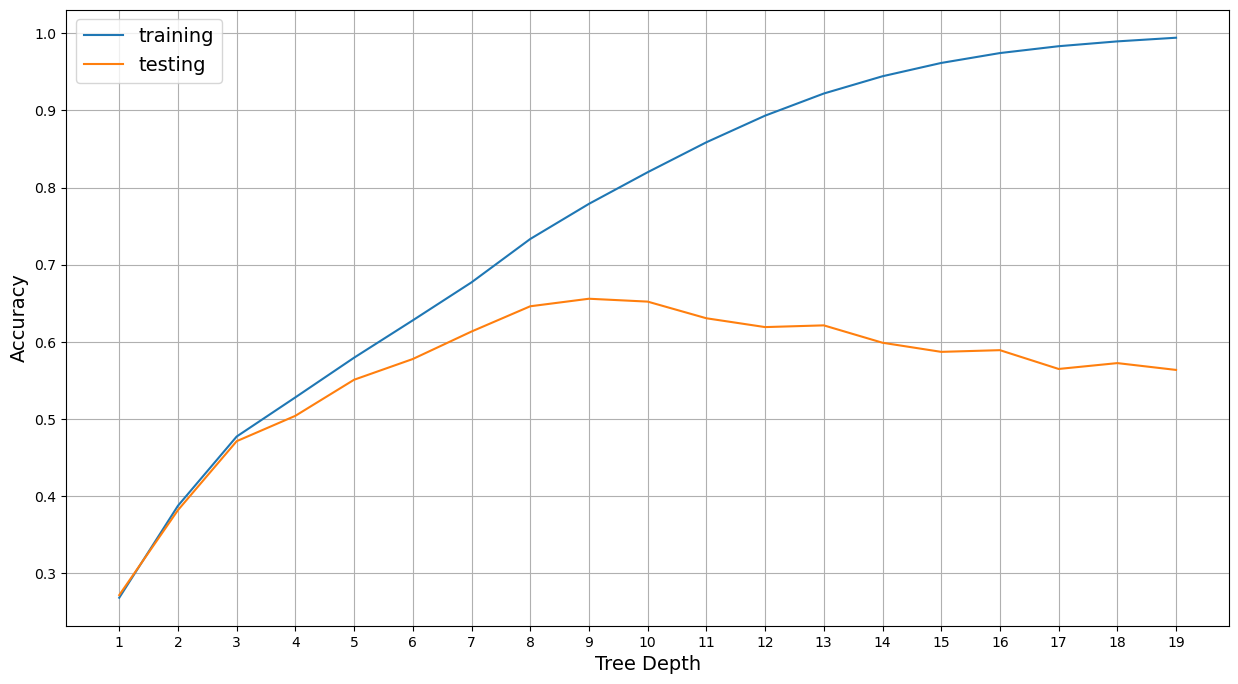

In [175]:
max_depth = []
acc_train = []
acc_test = []

for i in range(1, 20):
    tree_model = tree.DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_test.append(tree_model.score(X_test, y_test))
    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'acc_train': acc_train,
                  'acc_test': acc_test})

plt.plot(d.max_depth, d.acc_train, label='training')
plt.plot(d.max_depth, d.acc_test, label='testing')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

In [176]:
# lets try RandomizedSearchCV() and Pruning so that we can address overfitting issue.

### RandomizedSearchCV

In [177]:
dtr = DecisionTreeRegressor()

param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 20, 1),
}

dtr_rs = RandomizedSearchCV(dtr, 
                            param_distributions=param_grid,
                            cv=5, 
                            n_iter=100, 
                            scoring='neg_mean_squared_error')

dtr_rs.fit(X_train, y_train)

print(dtr_rs.best_params_)
print(-dtr_rs.best_score_) 

best_estimator = dtr_rs.best_estimator_
y_pred = best_estimator.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

{'min_samples_split': 18, 'max_depth': 10}
0.33359644584006753
Root Mean Squared Error: 0.5824206097845348


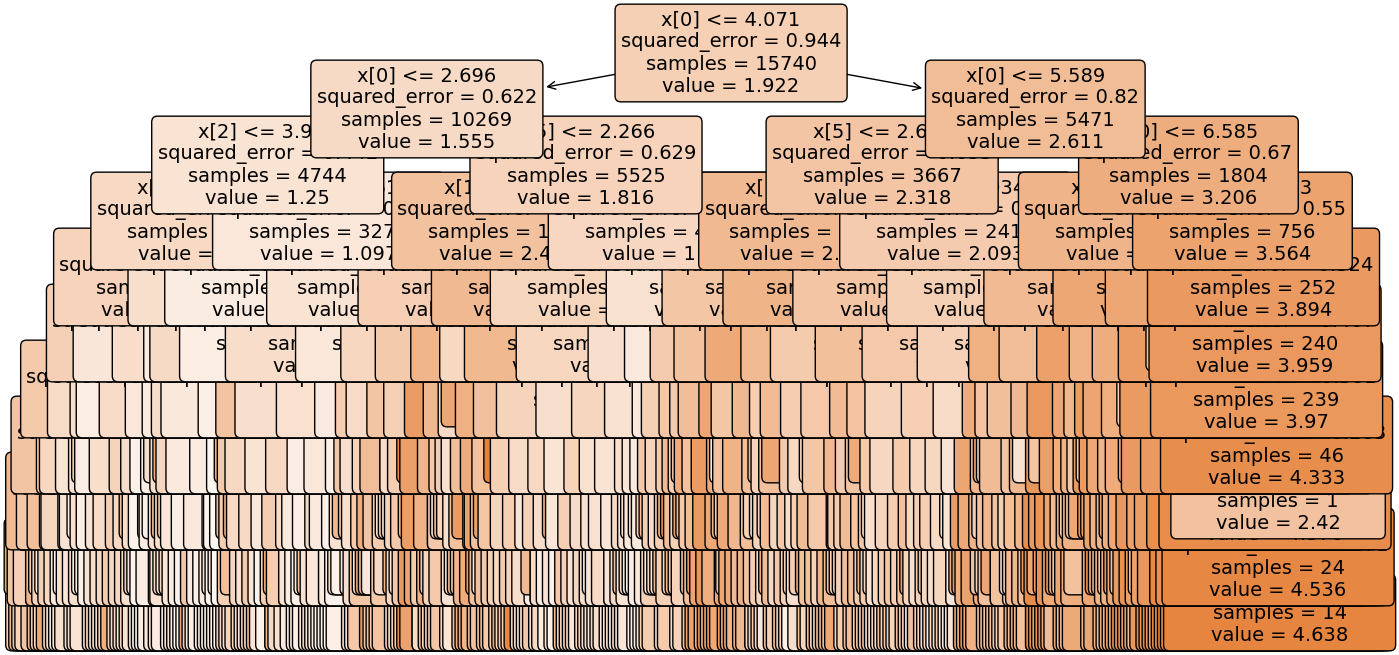

In [178]:
tree.plot_tree(dtr_rs.best_estimator_,
               filled = True,
               rounded = True,
               fontsize = 14);

### Pruning

In [179]:
# path = Decision_tree.cost_complexity_pruning_path(X_train, y_train)
# path

In [180]:
#ccp_alphas = path['ccp_alphas']
# ccp_alphas

In [233]:
#pruning_model = GridSearchCV(estimator = tree.DecisionTreeRegressor(), param_grid={'ccp_alpha': [alpha for alpha in ccp_alphas]},cv=5,scoring="accuracy")

In [234]:
# pruning_model.fit(X_train, y_train)

In [235]:
#print(pruning_model.best_params_)
#print(pruning_model.best_estimator_)

In [236]:
#print(pruning_model.best_score_) 

In [237]:
#pruning_model.score(X_test, y_test)

In [239]:
#plt.figure(figsize=(25,10))

#tree.plot_tree(pruning_model.best_estimator_,filled = True,rounded = True,fontsize = 20);

### Important Features

In [182]:
# Lets use the full decision tree model that we built on the entire dataset.
Decision_tree.feature_importances_

array([0.44249141, 0.05819091, 0.05082711, 0.03090958, 0.03462376,
       0.13182051, 0.11631494, 0.13482178])

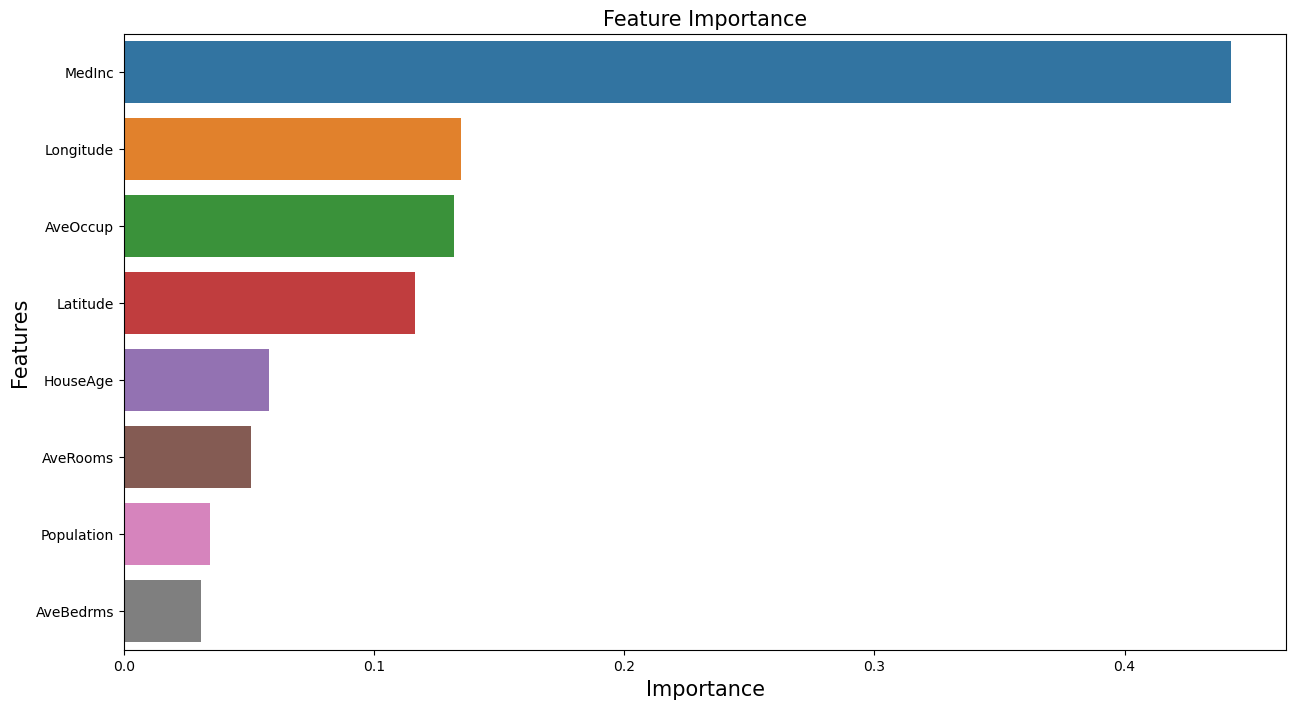

In [185]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': Decision_tree.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [186]:
# Now lets use the top 4 variables to predict the output.

In [187]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [188]:
X = df[['MedInc','AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (15740, 4)
X_test shape: (3935, 4)
y_train shape: (15740,)
y_test shape: (3935,)


In [194]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [195]:
dt_model.score(X_train, y_train)

1.0

In [196]:
dt_model.score(X_test, y_test)

0.5949109154333105

In [198]:
# A very poor performance by the model.
# Lets use some hyperparameter and check the score.

In [211]:
dt_model = DecisionTreeRegressor(max_depth = 10)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

- Tried with all the possible values of max depth but we have to comprimise either on the bias error or the variance error.

In [212]:
dt_model.score(X_train, y_train)

0.8146593381619679

In [210]:
dt_model.score(X_test, y_test)

0.6558309236310759

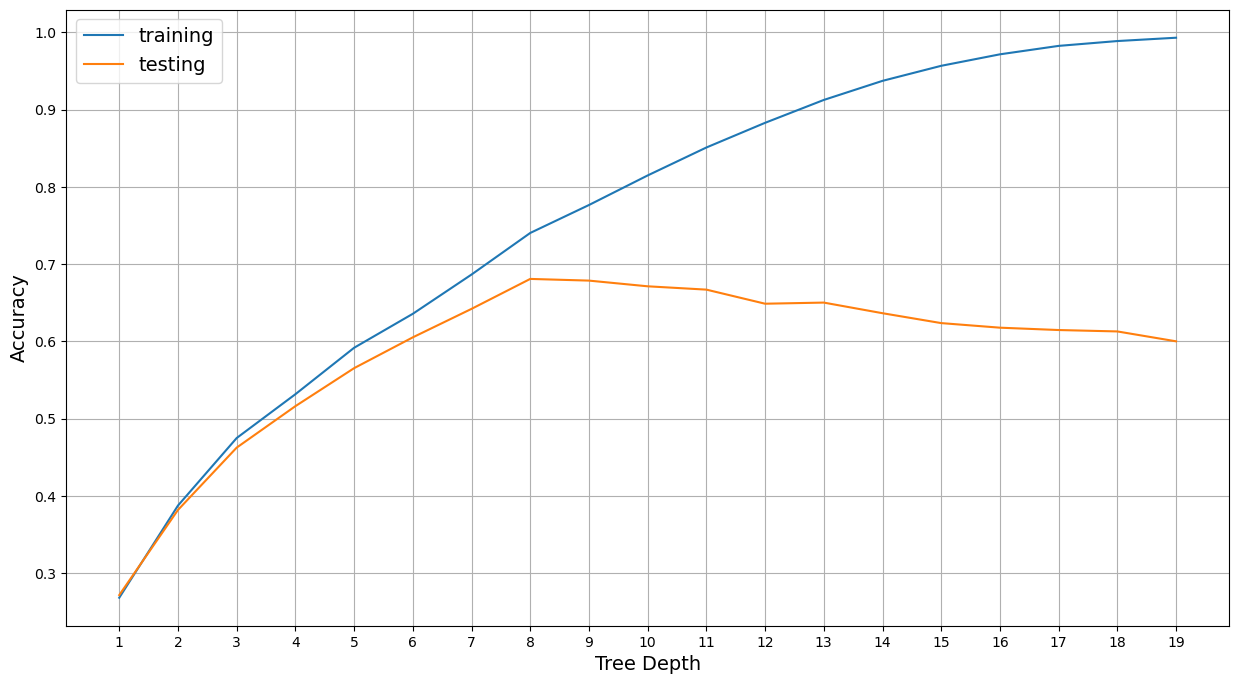

In [213]:
max_depth = []
acc_train = []
acc_test = []

for i in range(1, 20):
    tree_model = tree.DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_test.append(tree_model.score(X_test, y_test))
    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'acc_train': acc_train,
                  'acc_test': acc_test})

plt.plot(d.max_depth, d.acc_train, label='training')
plt.plot(d.max_depth, d.acc_test, label='testing')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

In [215]:
# At max_depth = 8, we can have the bias variance trade off.

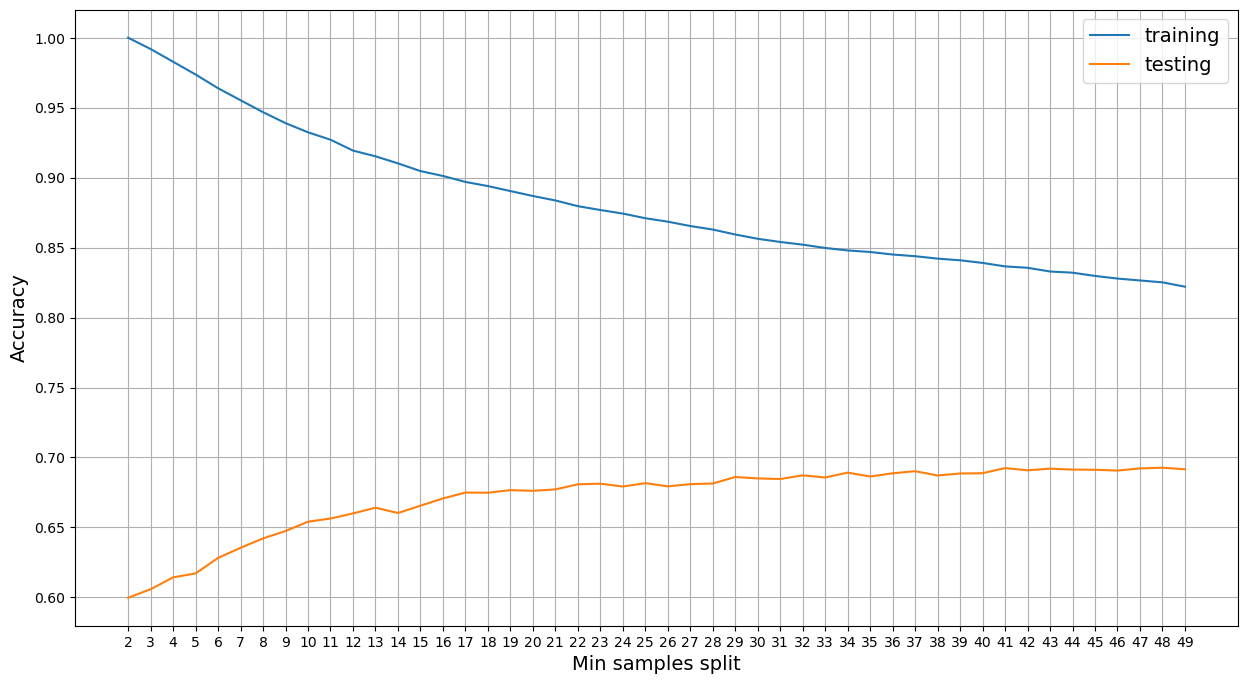

In [222]:
min_samples_split = []
acc_train = []
acc_test = []

for i in range(2, 50):
    tree_model = tree.DecisionTreeRegressor(min_samples_split=i)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_test.append(tree_model.score(X_test, y_test))
    
    min_samples_split.append(i)

d = pd.DataFrame({'min_samples_split' : min_samples_split,
                  'acc_train': acc_train,
                  'acc_test': acc_test})

plt.plot(d.min_samples_split, d.acc_train, label='training')
plt.plot(d.min_samples_split, d.acc_test, label='testing')
plt.xlabel('Min samples split', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(min_samples_split)
plt.grid()
plt.legend(fontsize=14);

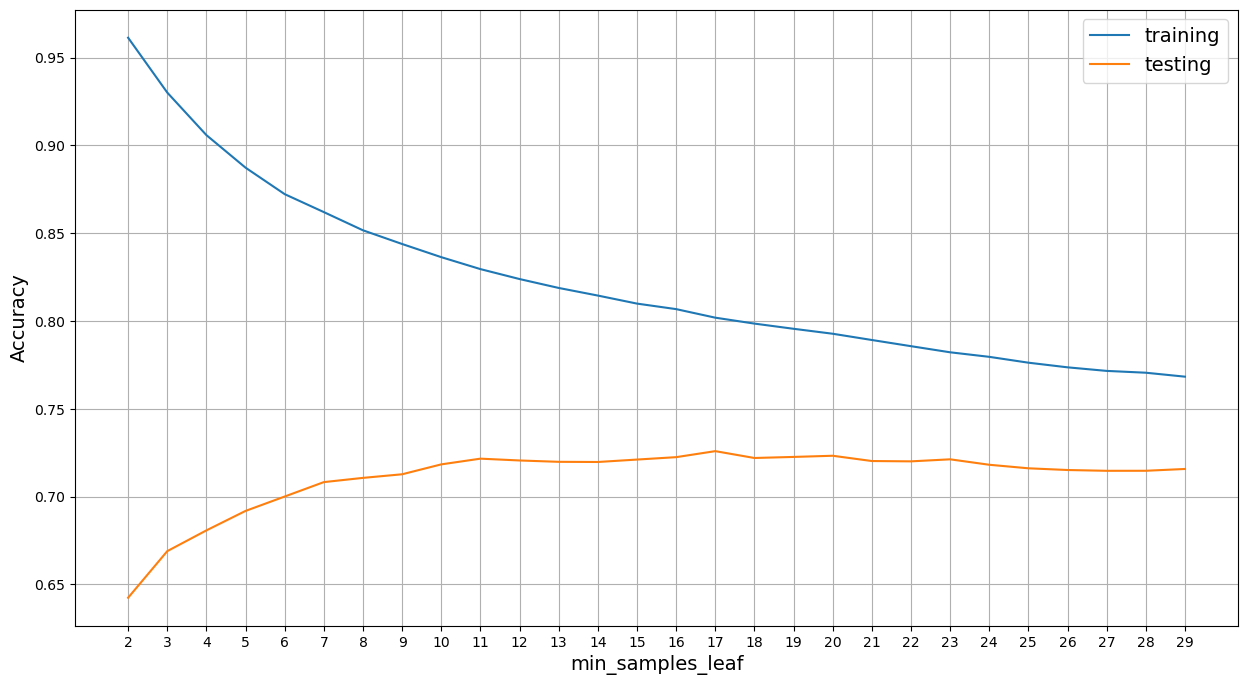

In [225]:
min_samples_leaf = []
acc_train = []
acc_test = []

for i in range(2, 30):
    tree_model = tree.DecisionTreeRegressor(min_samples_leaf=i)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_test.append(tree_model.score(X_test, y_test))
    
    min_samples_leaf.append(i)

d = pd.DataFrame({'min_samples_leaf' : min_samples_leaf,
                  'acc_train': acc_train,
                  'acc_test': acc_test})

plt.plot(d.min_samples_leaf, d.acc_train, label='training')
plt.plot(d.min_samples_leaf, d.acc_test, label='testing')
plt.xlabel('min_samples_leaf', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(min_samples_leaf)
plt.grid()
plt.legend(fontsize=14);

### Taking some random Explanatory Data Variables

In [227]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19675.000000  19675.000000  19675.000000  19675.000000  19675.000000   
mean       3.676717     28.386277      5.360901      1.096618   1440.812198   
std        1.570272     12.509113      2.292538      0.451839   1143.648725   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.526800     18.000000      4.414568      1.005894    796.000000   
50%        3.450000     28.000000      5.184322      1.048622   1179.000000   
75%        4.582600     37.000000      5.970677      1.099338   1746.000000   
max       15.000100     52.000000    132.533333     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  19675.000000  19675.000000  19675.000000  19675.000000  
mean       3.095189     35.651780   -119.563192      1.924779  
std       10.631977      2.149802      2.006108      0.977115  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.445486     33.930000   -121.760000      1.166000  
50%        2.837134     34.270000   -118.500000      1.738000  
75%        3.304894     37.730000   -117.990000      2.482000  
max     1243.333333     41.950000   -114.310000      5.000000

In [228]:
# lets take the values somewhere near to the mean.

In [229]:
df_values = pd.DataFrame({
    'MedInc': [2.5, 3.5, 5],
    'HouseAge': [25, 32, 38],
    'AveRooms': [3, 6, 9],
    'AveBedrms': [1, 1.5, 2.5],
    'Population': [1200, 1600, 2000],
    'AveOccup': [2, 4, 6],
    'Latitude': [34, 37, 39],
    'Longitude': [-115, -121, -120]
})

In [231]:
X_new = df_values.values
predicted_medians = Decision_tree.predict(X_new)
print("Predicted median house values:", predicted_medians)

Predicted median house values: [2.688 0.972 1.625]


### Summary

- We have built a Decision tree using a single predictor but usually its not a best practice.
- A full Decision tree is built on the whole data and checked for the acuracy score. The model is overfitting, having a train score of 100% and a test score of 60%.
- Then we used a hyperparameter max_depth to control the depth of the tree. The model was little bit underfitting but we can take a value where we can have bias variance trade off.
- Then we used RandomizedGridSearchCV to check for the optimal hyperparameters.
- We also tried with pruning but the model took almost more than an hour to produce the results. 
- After that using a full decision tree, we checked the most important variables in the data and built a decision tree using the top 4 variables.
- Finally, the model was overfitting but using the optimal hyper paramaters reduced the overfitting for some extent.